<a href="https://colab.research.google.com/github/seabay/ml_practice/blob/master/Reject_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import math

In [4]:
mu=15
sigma=5

x=np.arange(0, 30, 0.001) # entire range of x, both in and out of spec
y=norm.pdf(x, mu, sigma)

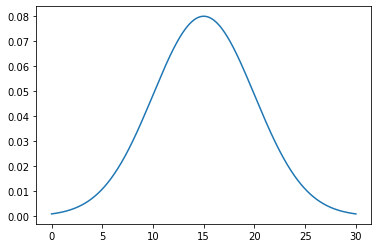

In [5]:
plt.plot(x, y)

In [7]:
# g(x): y=x*0.00222
# M=3

NUM_HISTOGRAM_BUCKETS=100
rngRange=30
NUM_TEST_SAMPLES=20000

def icdf_g():
  x=np.random.uniform(0,1,1)[0]
  return 1000.0 * np.sqrt(x) / np.sqrt(1111.0)

def pdf_f(x):
  return norm.pdf(x, 15, 5)

def pdf_g(x):
  return x*0.00222

def sample(M=3):

    samples=[]

    histogram=[0]*NUM_HISTOGRAM_BUCKETS
    fhistogram=[0]*NUM_HISTOGRAM_BUCKETS

    for i in range(NUM_TEST_SAMPLES):

        accept=False
        while not accept:

            s=icdf_g()
            fp=pdf_f(s)
            gp=pdf_g(s)*M

            v=fp/gp
            r=np.random.uniform(0,1)

            accept=(r<=v)

            if accept:
                bin = math.floor(s * float(NUM_HISTOGRAM_BUCKETS) / rngRange);
                histogram[min(bin, NUM_HISTOGRAM_BUCKETS - 1)] +=1; 
            else:
                bin = math.floor(s * float(NUM_HISTOGRAM_BUCKETS) / rngRange);
                fhistogram[min(bin, NUM_HISTOGRAM_BUCKETS - 1)] +=1;     

    return histogram


In [8]:
ret =sample()

In [11]:
ret1=[NUM_HISTOGRAM_BUCKETS * float(ret[i]) / (float(NUM_TEST_SAMPLES)*rngRange) for i in range(NUM_HISTOGRAM_BUCKETS)]

In [12]:
fvs1=[pdf_f((float(i) + 0.5) * rngRange / float(NUM_HISTOGRAM_BUCKETS)) for i in range(NUM_HISTOGRAM_BUCKETS)]

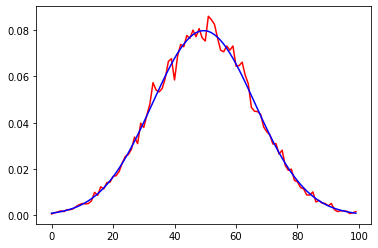

In [13]:
plt.plot(ret1, c='r')
plt.plot(fvs1, c='b')